In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Loading the data

In [2]:
thyroid_disease_data = pd.read_csv('../final_project/data/Thyroid-Dataset.csv')

In [3]:
thyroid_disease_data.shape

(9171, 23)

In [4]:
pd.set_option('display.max_columns', None)
thyroid_disease_data.head(10)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral source,class
0,29,F,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1.6,1.9,128.0,NaN,NaN,other,negative
1,41,F,False,False,False,False,False,False,False,False,True,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,other,negative
2,36,F,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,other,negative
3,32,F,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,other,miscellaneous
4,60,F,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,other,negative
5,77,F,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,other,negative
6,28,F,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.7,2.6,116.0,NaN,NaN,SVI,negative
7,28,F,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1.2,1.8,76.0,NaN,NaN,other,negative
8,28,F,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1.9,1.7,83.0,NaN,NaN,other,negative
9,54,F,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1.9,2.3,133.0,NaN,NaN,other,negative


### Data Exploration

In [5]:
def generate_value_counts(data: pd.DataFrame) -> str:
    
    for col in data.columns:
        print(data[col].value_counts())

In [6]:
generate_value_counts(thyroid_disease_data)

age
60       209
62       208
72       207
59       201
61       192
        ... 
3          2
455        1
65511      1
65512      1
65526      1
Name: count, Length: 100, dtype: int64
sex
F    6072
M    2792
Name: count, dtype: int64
on thyroxine
False    7931
True     1240
Name: count, dtype: int64
query on thyroxine
False    9018
True      153
Name: count, dtype: int64
on antithyroid medication
False    9055
True      116
Name: count, dtype: int64
sick
False    8827
True      344
Name: count, dtype: int64
pregnant
False    9064
True      107
Name: count, dtype: int64
thyroid surgery
False    9037
True      134
Name: count, dtype: int64
I131 treatment
False    9002
True      169
Name: count, dtype: int64
query hypothyroid
False    8542
True      629
Name: count, dtype: int64
query hyperthyroid
False    8520
True      651
Name: count, dtype: int64
lithium
False    9078
True       93
Name: count, dtype: int64
goitre
False    9087
True       84
Name: count, dtype: int64
tumor
False    

In [7]:
thyroid_disease_data.isnull().sum()

age                             0
sex                           307
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH                           842
T3                           2603
TT4                           441
T4U                           808
FTI                           801
referral source                 0
class                           0
dtype: int64

    There are too many missing values in the T3 column, probably will not be used in the analysis.

In [8]:
thyroid_disease_data.dtypes

age                            int64
sex                           object
on thyroxine                    bool
query on thyroxine              bool
on antithyroid medication       bool
sick                            bool
pregnant                        bool
thyroid surgery                 bool
I131 treatment                  bool
query hypothyroid               bool
query hyperthyroid              bool
lithium                         bool
goitre                          bool
tumor                           bool
hypopituitary                   bool
psych                           bool
TSH                          float64
T3                           float64
TT4                          float64
T4U                          float64
FTI                          float64
referral source               object
class                         object
dtype: object

In [9]:
thyroid_disease_data.loc[thyroid_disease_data.age >= 455]

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral source,class
2975,455,F,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1.10,2.0,118.0,1.13,104.0,SVI,negative
5709,65511,M,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.38,2.0,113.0,1.08,104.0,other,negative
6391,65512,M,False,False,False,False,False,False,False,False,True,False,False,False,False,False,0.03,2.8,112.0,0.84,133.0,other,negative
8104,65526,F,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1.50,NaN,132.0,1.02,129.0,other,negative


    There are few invalid values in the age column, but the other columns for these records look correct so instead of removing them we might replace them with another value, e.g. average age. 

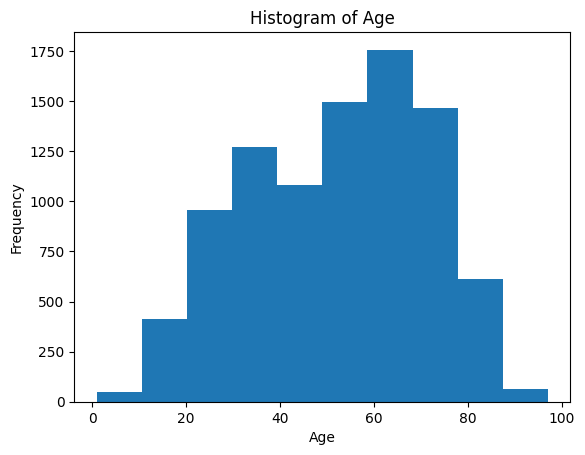

In [10]:
plt.hist(thyroid_disease_data.loc[thyroid_disease_data.age <= 100, 'age'], bins = 10)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age")
plt.show()

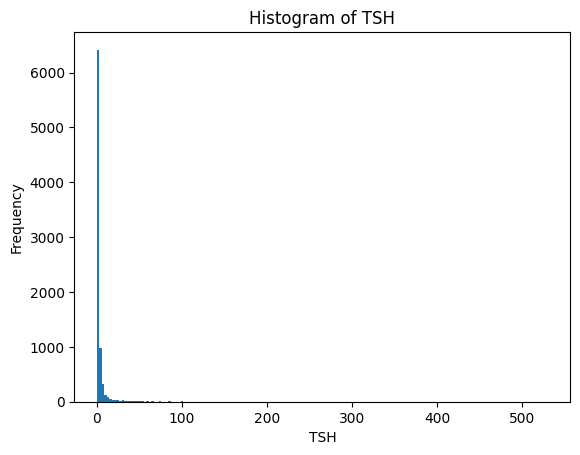

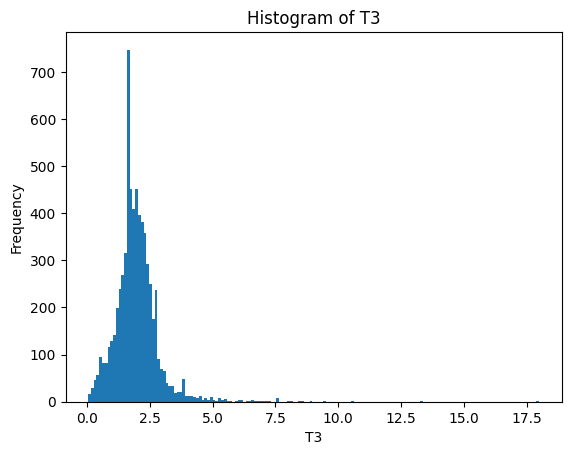

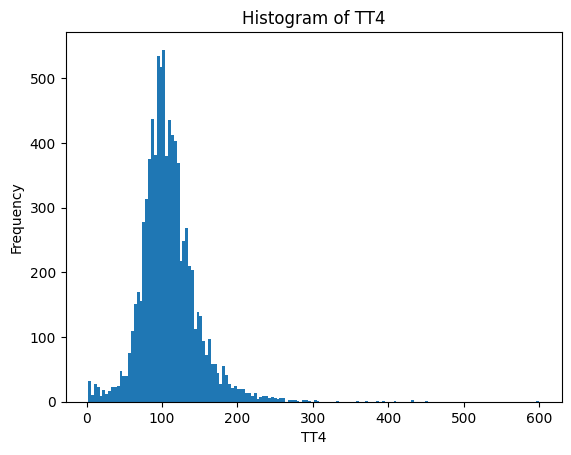

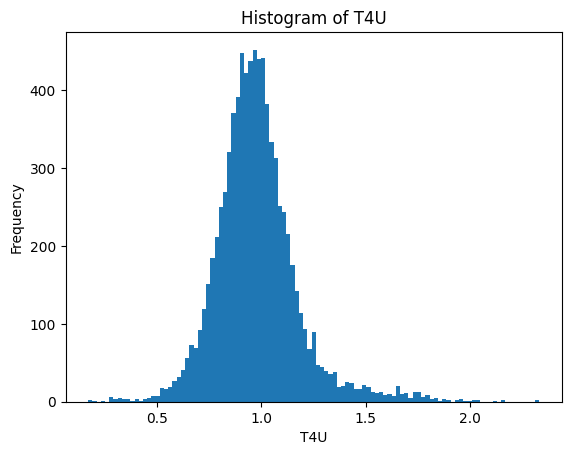

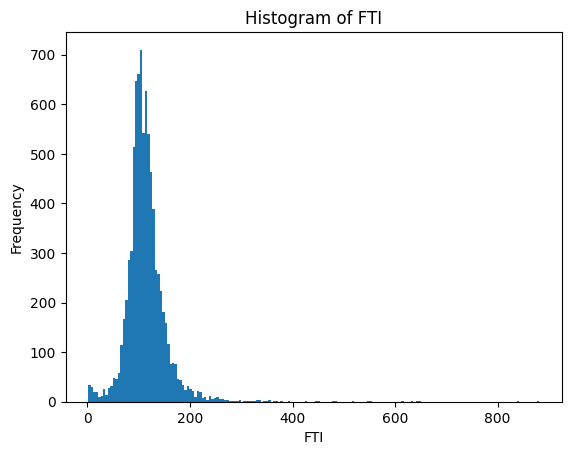

In [11]:
for col in ['TSH', 'T3', 'TT4', 'T4U', 'FTI']:
    plt.hist(thyroid_disease_data[col], bins = 'auto')
    plt.xlabel(f'{col}')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.show()

In [12]:
thyroid_disease_data.TSH.describe()

count    8329.000000
mean        5.218993
std        24.185398
min         0.005000
25%         0.460000
50%         1.400000
75%         2.700000
max       530.000000
Name: TSH, dtype: float64

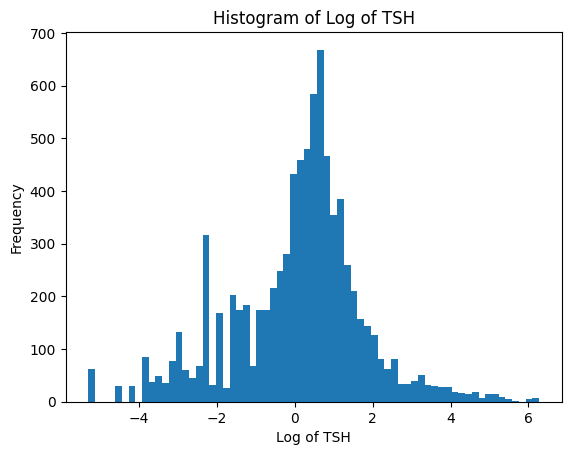

In [13]:
plt.hist(np.log(thyroid_disease_data.TSH), bins = 'auto')
plt.xlabel('Log of TSH')
plt.ylabel('Frequency')
plt.title(f'Histogram of Log of TSH')
plt.show()

### Data Processing

#### Convert column names to snake case

In [14]:
def convert_to_snake_case(column):
    
    column = column.lower().replace(' ', '_')
    return column


In [15]:
thyroid_disease_data.columns = [convert_to_snake_case(col) for col in thyroid_disease_data.columns]
thyroid_disease_data.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'i131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'tsh', 't3', 'tt4', 't4u',
       'fti', 'referral_source', 'class'],
      dtype='object')

In [21]:
thyroid_disease_data.dtypes

age                          float64
sex                           object
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
sick                           int64
pregnant                       int64
thyroid_surgery                int64
i131_treatment                 int64
query_hypothyroid              int64
query_hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
tsh                          float64
t3                           float64
tt4                          float64
t4u                          float64
fti                          float64
referral_source               object
class                         object
dtype: object

#### Convert binary columns to numericsl

In [16]:
bool_cols = thyroid_disease_data.select_dtypes(include = 'bool').columns
thyroid_disease_data[bool_cols] = thyroid_disease_data[bool_cols].astype('int')
thyroid_disease_data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,i131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,tsh,t3,tt4,t4u,fti,referral_source,class
0,29,F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.6,1.9,128.0,NaN,NaN,other,negative
1,41,F,0,0,0,0,0,0,0,0,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,other,negative
2,36,F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,other,negative
3,32,F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,other,miscellaneous
4,60,F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,other,negative


In [17]:
generate_value_counts(thyroid_disease_data)

age
60       209
62       208
72       207
59       201
61       192
        ... 
3          2
455        1
65511      1
65512      1
65526      1
Name: count, Length: 100, dtype: int64
sex
F    6072
M    2792
Name: count, dtype: int64
on_thyroxine
0    7931
1    1240
Name: count, dtype: int64
query_on_thyroxine
0    9018
1     153
Name: count, dtype: int64
on_antithyroid_medication
0    9055
1     116
Name: count, dtype: int64
sick
0    8827
1     344
Name: count, dtype: int64
pregnant
0    9064
1     107
Name: count, dtype: int64
thyroid_surgery
0    9037
1     134
Name: count, dtype: int64
i131_treatment
0    9002
1     169
Name: count, dtype: int64
query_hypothyroid
0    8542
1     629
Name: count, dtype: int64
query_hyperthyroid
0    8520
1     651
Name: count, dtype: int64
lithium
0    9078
1      93
Name: count, dtype: int64
goitre
0    9087
1      84
Name: count, dtype: int64
tumor
0    8930
1     241
Name: count, dtype: int64
hypopituitary
0    9169
1       2
Name: count, dtyp

#### Replace wrong Age data with the average Age

In [18]:
thyroid_disease_data.age = np.where(thyroid_disease_data.age > 100, np.mean(thyroid_disease_data.age), thyroid_disease_data.age)

In [19]:
thyroid_disease_data.age.value_counts()

age
60.0    209
62.0    208
72.0    207
59.0    201
61.0    192
       ... 
97.0      3
95.0      3
9.0       2
5.0       2
3.0       2
Name: count, Length: 97, dtype: int64

#### Missing value imputation

    Before chosing a method for missing value imputation, we want to understand if the data is missing at random or there is a pattern. I will start by exploring the relationship between the missing values in the given column and the variable class, which will be subsequently used as a target variable (after some processing).

In [46]:
non_missing = pd.DataFrame(thyroid_disease_data.loc[~thyroid_disease_data.t3.isnull(), 'class'].value_counts(normalize=True))
non_missing

,proportion
class,
negative,0.725030
general health,0.083892
hypothyroid conditions,0.065317
binding protein,0.041565
replacement therapy,0.030451
discordant results,0.026492
hyperthyroid conditions,0.022229
antithyroid treatment,0.005024


In [47]:
missing = pd.DataFrame(thyroid_disease_data.loc[thyroid_disease_data.t3.isnull(), 'class'].value_counts(normalize=True))
missing

,proportion
class,
negative,0.771418
hypothyroid conditions,0.063004
binding protein,0.054168
replacement therapy,0.052247
miscellaneous,0.032655
hyperthyroid conditions,0.013830
discordant results,0.008836
general health,0.003842


In [48]:
combined = pd.merge(non_missing, missing, left_index = True, right_index = True)
combined

,proportion_x,proportion_y
class,,
negative,0.725030,0.771418
general health,0.083892,0.003842
hypothyroid conditions,0.065317,0.063004
binding protein,0.041565,0.054168
replacement therapy,0.030451,0.052247
discordant results,0.026492,0.008836
hyperthyroid conditions,0.022229,0.013830


/var/folders/d7/1cpxgdm55xs_21t9mdm68n3r0000gp/T/ipykernel_10370/3094987055.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(combined.index, rotation=90)


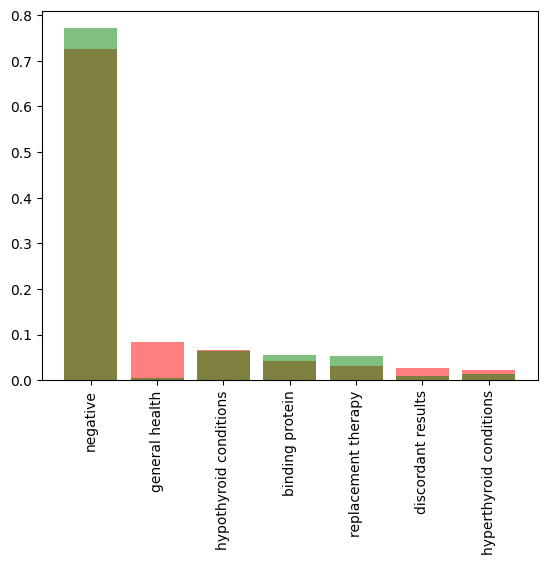

In [56]:
plt.bar(combined.index, combined.proportion_x, alpha = 0.5, color = 'r')
plt.bar(combined.index, combined.proportion_y, alpha = 0.5, color = 'g')
ax = plt.gca()
ax.set_xticklabels(combined.index, rotation=90)
plt.show()

    There is a difference between the two distributions, for example there are almost no cases with value 'general health' when the T3 is missing. But we will be interested in predicting hypothyroidism and the relative frequency of hypothyroid condition is the same among observations with missing and non-missing T3. Given that, I assume that it is safe to impute the missing values with the mean. 

    Let's do the same for the other four columns with missing values, namely TSH, TT4, T4U and FTI. 